# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Speed of convergence

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import newton
import math
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Brief reminders

Previously: finding root of $f$, i.e. solution to

$$f(x) = 0.$$

Iteration: define sequence $\{x_n\}$ using map $g : x_n
  \rightarrow x_{n+1}$. Map designed such that fixed points of $g$ are
roots of $f$. If sequence converges, have found a root.

For a contraction mapping with Lipschitz constant $L < 1$ map converges,
with error

$$|e_n| \leq \frac{L^n}{1 - L} |x_1 - x_0|.$$

Error depends on worst case value of $L$ in whole interval. Often find
faster convergence for better initial guesses.

## Speed of convergence

Expect speed of convergence to depend on map $g$ near
root $s$. Can show this for “nice” $g$ and “good” $x_n$.

Define error at $n^{\text{th}}$ stage

$$e_n = x_n - s.$$

As $s$ is a fixed point of $g$, use Taylor expansion of $e_{n+1}$:

$$\begin{aligned}
        e_{n+1} = x_{n+1} - s & = g(x_n) - g(s) \\
        & = g'(s) (x_n - s) + \tfrac{1}{2!} g''(s) (x_n - s)^2 + \dots \\
        & = g'(s) e_n + \tfrac{1}{2!} g''(s) e_n^2 + \dots
      \end{aligned}$$


If error small then a *linear* or *first order* method converges as

$$e_{n+1} \sim g'(s) e_n;$$

decreases by a constant amount each step, proportional to the derivative
of the map at the root.


If $g'(s) \equiv 0$ and error small a *quadratic* or *second order* map
converges as

$$e_{n+1} \sim g''(s) e_n^2.$$

The more derivatives of $g$ that vanish at the root, the faster the
convergence (but the better the guess must be).

## Example methods

### General framework

As usual we are trying to solve

$$f(x) = 0$$

for $x \in [a,b]$. Functional iteration is map

$$g(x) = x - f(x);$$

at fixed points of this map $f(x)$ must vanish.

Simple generalization: introduce $\varphi(x) \neq 0$, then

$$g(x) = x - \varphi(x) f(x)$$

also has that $g(s) = s \, \implies \, f(s) = 0 \, \implies$ root.

Increase speed of convergence by choice of $\varphi$, provided

$$0 < \varphi(x) < \infty, \quad x \in [a, b].$$

### Chord method

Simplest choice: $\varphi(x) = m \neq 0$, giving

$$g(x) = x - m f(x).$$

This is known as the *chord method*.

Free to choose $m$, provided that $g$ is a contraction mapping in
$[a,b]$. Requires $|g'(x)| < 1$ in interval; implies

$$\begin{aligned}
    && | 1 - m f'(x) | & < 1 & \forall x & \in [a,b] \\
    \Rightarrow && 0 < m f'(x) & < 2 & \forall x & \in [a,b].
  \end{aligned}$$

If $m = 1 / f'(s)$ then method converges quadratically.

#### Chord method: geometric picture

Usual geometric picture: move on horizontal and vertical lines from map
to $y=x$ and axis.

Chord method geometric picture: move on lines of constant slope $1/m$
from map to axis to find next $x_n$.

Note that this plot uses $f(x)$; the previous plots used $g(x)$.

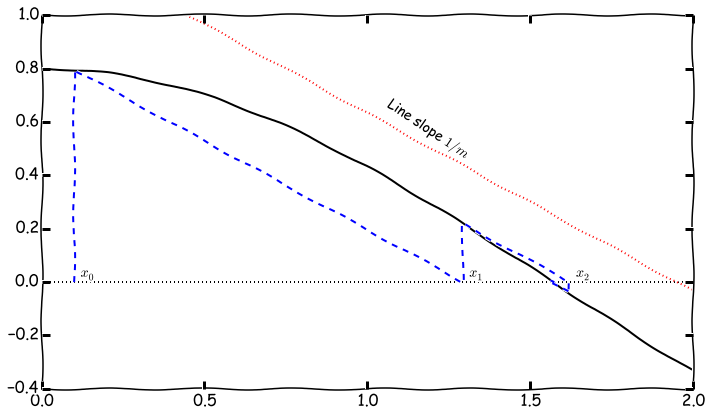

In [3]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
m = -0.75 * 2.0 # Max value of derivative will be 0.8: reduce to 0.75 for safety factor
def g_sketch(x, m):
    return x - m * 0.8 * np.cos(x)
iters = 0.1 * np.ones((5,))
for n in range(4):
    iters[n+1] = g_sketch(iters[n], m)
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

x_slope = np.array([0.0, 2.0])
y_slope = 1.3 + x_slope / m

with plt.xkcd():
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
    ax.plot(np.repeat(iters, 2), plot_results, 'b--')
    ax.plot(x_slope, y_slope, 'r:')
    ax.hlines(0.0, 0.0, 2.0, linestyles=':')
    ax.text(1.05, 1.35 + 1.05 / m, r"Line slope $1/m$", rotation = 180.0 / np.pi * math.atan(1.0/m))
    for i in range(3):
        label_text = r"$x_{}$".format(i)
        ax.text(iters[i]+0.02, 0.02, label_text)
    ax.set_ybound(-0.4, 1.0)
    fig.tight_layout()
plt.show()

#### Example of the chord method

We look at

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

The generic chord method has map

$$g(x) = x ( 1 - m ) + m \cos(x),$$

and the range of allowable $m$ values is

$$0 <  | m + m \sin(x) | < 2$$

implying $0<|m|<2$ and $0<|1.8415 m|<2$. Choosing $m = 1.08 \,
  (\lesssim 2 / 1.8415)$ we obtain the iteration map

$$x_{n+1} = -0.08 x_n + 1.08 \cos(x_n).$$

Sequence produced by map

$$x_{n+1} = -0.08 x_n + 1.08 \cos(x_n)$$

starting from zero is

$$\begin{aligned}
            x_0 & = 0 \\
            x_1 & =    1.0800 \\
            x_2 & =    0.4226 \\
            x_3 & =    0.9512 \\
            x_4 & =    0.5511 \\
            x_5 & = 0.8760
          \end{aligned}$$

converges linearly to solution $s = 0.739085\dots$.

In [4]:
def chord_method(f, x0, m, n_iterations = 100):
    """Chord method"""
    def g(x): 
        return x - m * f(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])
    
    return iters

In [5]:
def f1(x):
    return x - np.cos(x)

result1 = chord_method(f1, 0.0, 1.08)

for i in range(6):
    print("Result after {} iterations is {:6f}".format(i, result1[i]))

Result after 0 iterations is 0.000000
Result after 1 iterations is 1.080000
Result after 2 iterations is 0.422635
Result after 3 iterations is 0.951162
Result after 4 iterations is 0.551104
Result after 5 iterations is 0.876014


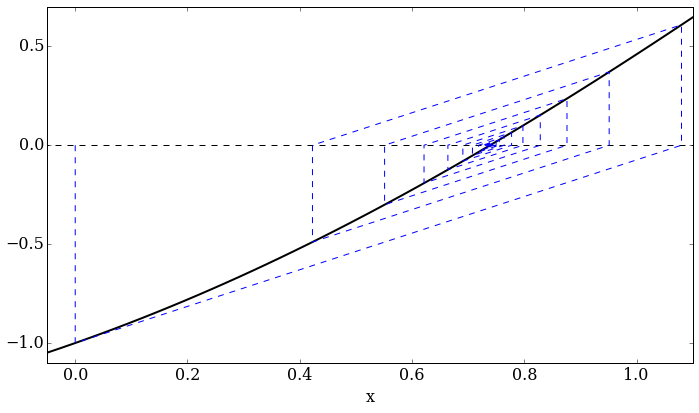

In [6]:
x = np.linspace(-0.1, 1.1)
f1x = f1(x)
plot_results = np.empty((2*result1.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

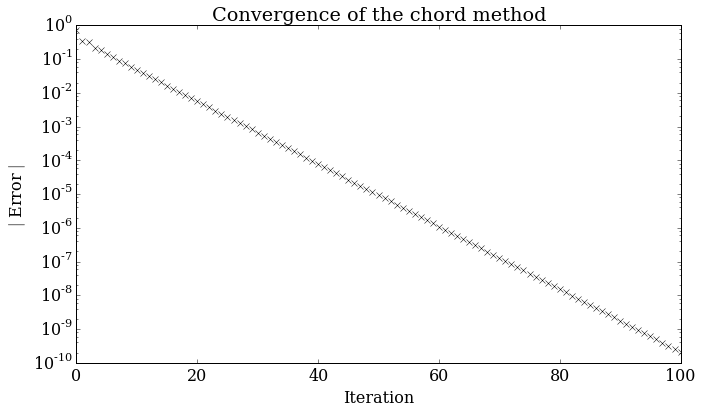

In [7]:
x_exact = newton(f1, 0.7)
chord_error = np.abs(result1 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(chord_error)), chord_error, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title('Convergence of the chord method')
fig.tight_layout()
plt.show()

### Newton’s method

For quadratic convergence need $g'(s) \equiv 0$. Newton’s method: choose

$$\varphi(x)  = \frac{1}{f'(x)} \quad \implies \quad g(x)  = x - \frac{f(x)}{f'(x)}.$$

A simple check shows

$$g'(s)  = 1 - 1 + \frac{f(s) f''(s)}{\left( f'(s) \right)^2} = 0.$$

The iteration scheme is

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)};$$

more complex, has limitations:

-   Needs derivative. If unknown, better to use secant method.

-   If derivative vanishes at root, speed of convergence calculation is
    wrong. Problem for multiple roots, for which Newton’s method
    converges at best linearly.

#### Newton’s method: geometric picture

Geometric picture for Newton’s method: move on lines with slope given by
derivative at $x_n$.

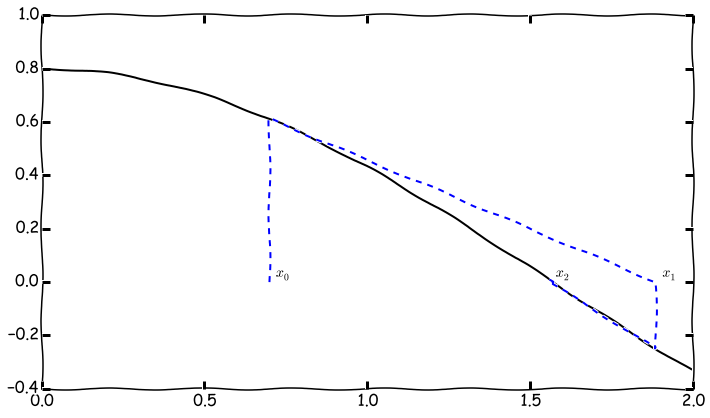

In [8]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
def g_sketch(x):
    return x + np.cos(x) / np.sin(x)
iters = 0.7*np.ones((5,))
for n in range(4):
    iters[n+1] = g_sketch(iters[n])
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

with plt.xkcd():
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
    ax.plot(np.repeat(iters, 2), plot_results, 'b--')
    for i in range(3):
        label_text = r"$x_{}$".format(i)
        ax.text(iters[i]+0.02, 0.02, label_text)
    ax.set_ybound(-0.4, 1.0)
    fig.tight_layout()
plt.show()

#### Example of Newton’s method

We again look at

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

Newton’s method has map

$$\begin{aligned}
    g(x) & = x - \frac{f(x)}{f'(x)} \\
    & = \frac{x \sin(x) + \cos(x)}{1 + \sin(x)}.
  \end{aligned}$$

As $f' \ne 0$ in the domain, expect quadratic convergence.

Sequence produced by map

$$x_{n+1} = \frac{x_n \sin(x_n) + \cos(x_n)}{1 + \sin(x_n)},$$

starting from zero is

$$\begin{aligned}
            x_0 & = 0.0000000000 \\
            x_1 & = 1.0000000000 \\
            x_2 & = 0.7503638678 \\
            x_3 & = 0.7391128909 \\
            x_4 & = 0.7390851334 \\
            x_5 & = 0.7390851332
          \end{aligned}$$

converges quadratically to solution $s = 0.739085\dots$.

In [9]:
def newton_method(f, df, x0, n_iterations = 10):
    """Newton's method"""
    def g(x): 
        return x - f(x) / df(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])
    
    return iters

In [10]:
def df1(x):
    return 1.0 + np.sin(x)

result2 = newton_method(f1, df1, 0.0)

for i in range(6):
    print("Result after {} iterations is {:10f}".format(i, result2[i]))

Result after 0 iterations is   0.000000
Result after 1 iterations is   1.000000
Result after 2 iterations is   0.750364
Result after 3 iterations is   0.739113
Result after 4 iterations is   0.739085
Result after 5 iterations is   0.739085


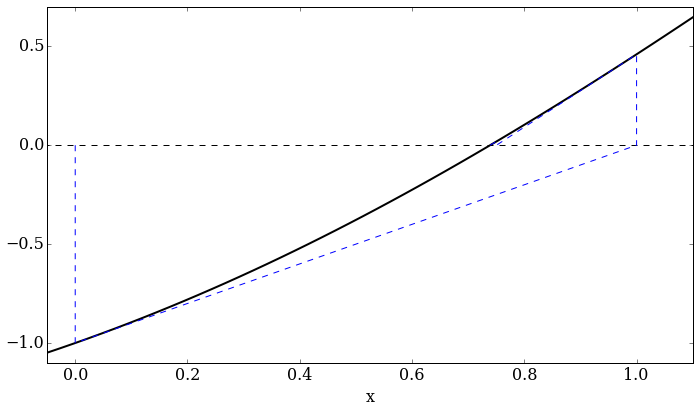

In [11]:
plot_results = np.empty((2*result2.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result2)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result2,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

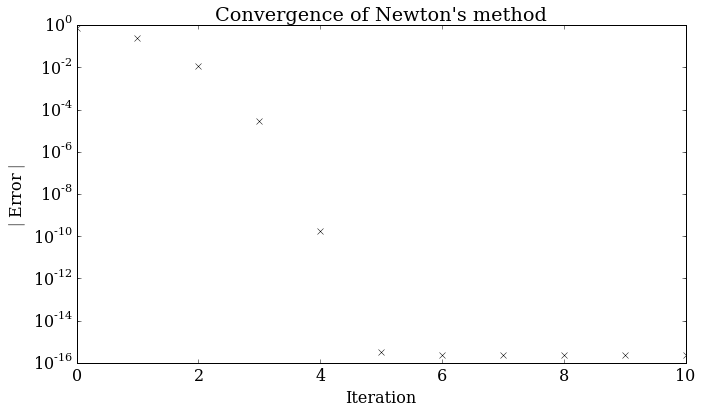

In [12]:
x_exact = newton(f1, 0.7) # Note that the "exact" solution comes from a library function called newton, which here is not
                          # actually using Newton's method as given here (we haven't provided the derivative!)
newton_error = np.abs(result2 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(newton_error)), newton_error, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Newton's method")
fig.tight_layout()
plt.show()

### Secant method

Key disadvantage of Newton’s method: needs derivative $f'(x)$. Extra
function evaluations add cost, even where derivative can be computed.
The Secant Method instead approximates derivative using

$$f'(x_n) \simeq \frac{f \left (x_n \right ) - f \left ( x_{n-1}
      \right )}{x_n - x_{n-1}} .$$

This results in the iteration scheme

$$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}.$$

Does not match framework: *two* previous values in sequence. Means two
initial guesses required, and contraction mapping theorems cannot be
used. Can show that method converges; often more useful and faster than
Newton’s method.

#### Secant method: geometric picture

Geometric picture for Secant method: move on lines whose slope is
determined by secant to function through $x_{n-1}, x_n$.

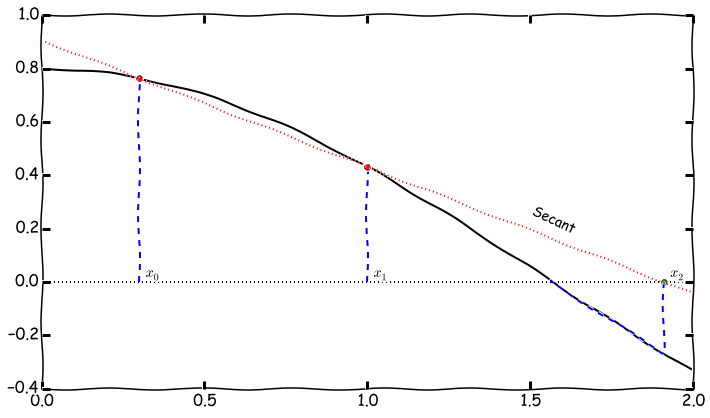

In [13]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
iters = 0.3 * np.ones((5,))
iters[1] = 1.0
for n in range(1, 4):
    iters[n+1] = iters[n] - np.cos(iters[n]) * (iters[n] - iters[n-1]) / (np.cos(iters[n]) - np.cos(iters[n-1]))
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

x_slope = np.array([0.0, 2.0])
y_slope = 0.8*np.cos(0.3) + (x_slope - 0.3) / 0.7 * 0.8 * (np.cos(1.0) - np.cos(0.3))

with plt.xkcd():
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
    ax.plot(np.repeat(iters[0], 2), plot_results[0:2], 'b--')
    ax.plot(np.repeat(iters[1], 2), plot_results[2:4], 'b--')
    ax.plot(iters[0], plot_results[1], 'ro')
    ax.plot(iters[1], plot_results[3], 'ro')
    ax.plot(iters[2], plot_results[4], 'go')
    ax.plot(np.repeat(iters[2:], 2), plot_results[4:], 'b--')
    ax.plot(x_slope, y_slope, 'r:')
    ax.hlines(0.0, 0.0, 2.0, linestyles=':')
    ax.text(1.5, 0.25, r"Secant", rotation = -25)
    for i in range(3):
        label_text = r"$x_{}$".format(i)
        ax.text(iters[i]+0.02, 0.02, label_text)
    ax.set_ybound(-0.4, 1.0)
    fig.tight_layout()
plt.show()

#### Example of the Secant method

Again look at

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

The Secant method has the iteration scheme (no map!)

$$x_{n+1}  = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}.$$

Expect slightly slower convergence than Newton’s method.

Sequence uses iteration

$$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})},$$

starting from $x_0=0,x_1=1$:

$$\begin{aligned}
            x_0 & = 0.0000000000 \\
            x_1 & = 1.0000000000 \\
            x_2 & = 0.6850733573 \\
            x_3 & = 0.7362989976 \\
            x_4 & = 0.7391193619 \\
            x_5 & = 0.7390851121
          \end{aligned}$$

converges to solution $s = 0.739085\dots$.

In [14]:
def secant_method(f, x0, x1, n_iterations = 10):
    """ Secant method"""
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    iters[1] = x1
    for n in range(1, n_iterations):
        iters[n+1] = iters[n] - f(iters[n]) * (iters[n] - iters[n-1]) / (f(iters[n]) - f(iters[n-1]))
    
    return iters

In [15]:
result3 = secant_method(f1, 0.0, 1.0)

for i in range(6):
    print("Result after {} iterations is {:10f}".format(i, result3[i]))

Result after 0 iterations is   0.000000
Result after 1 iterations is   1.000000
Result after 2 iterations is   0.685073
Result after 3 iterations is   0.736299
Result after 4 iterations is   0.739119
Result after 5 iterations is   0.739085


-c:7: RuntimeWarning: invalid value encountered in double_scalars


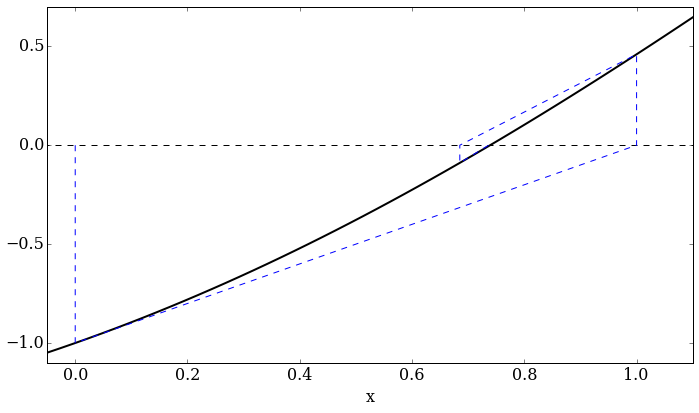

In [16]:
plot_results = np.empty((2*result3.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result3)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result3,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

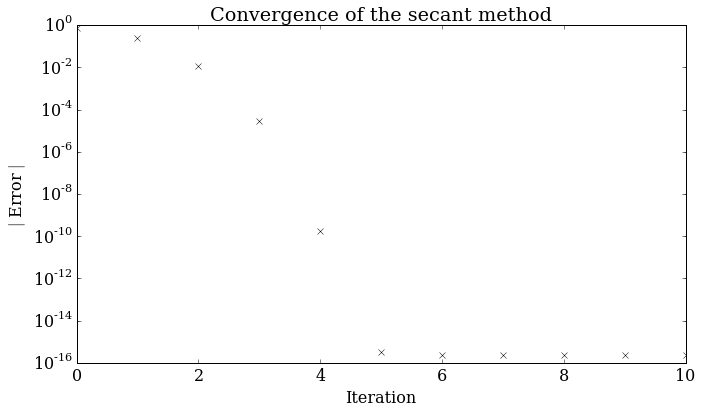

In [17]:
secant_error = np.abs(result3 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(secant_error)), newton_error, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of the secant method")
fig.tight_layout()
plt.show()

## Summary

-   The speed of convergence from the error bound using the Lipschitz
    constant $L$ is the worst-case scenario. Normally we expect the
    speed of convergence to be determined by properties of the map near
    the root $s$.

-   By generalizing our iterative map to

    $$g(x) = x - \varphi(x) f(x), \quad \varphi(x) \neq 0$$

    we still have that fixed points of $g$ are roots of $f$, but can
    speed convergence by varying $\varphi$.

-   The more derivatives of $g$ that vanish at the root, the faster the
    convergence, but the better the initial guess must be.

-   The chord method and Newton’s method fit in this general framework
    and converge linearly and quadratically respectively.

-   The secant method does not fit in this framework. It takes more
    iterations to converge than Newton’s method, but is often faster in
    practice.